In [1]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [17]:
diabetes.feature_names #checking the feature names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
diabetes.data.shape  #checking the shape of data

(442, 10)

In [19]:
diabetes.target.shape

(442,)

In [30]:
db_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
db_df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
82,-0.016412,-0.044642,-0.035307,-0.026328,0.032830,0.017162,0.100183,-0.039493,-0.070209,-0.079778
188,0.005383,-0.044642,-0.002973,0.049415,0.074108,0.070710,0.044958,-0.002592,-0.001499,-0.009362
24,-0.063635,-0.044642,0.035829,-0.022885,-0.030464,-0.018850,-0.006584,-0.002592,-0.025952,-0.054925
129,0.009016,-0.044642,0.016428,0.004658,0.009439,0.010586,-0.028674,0.034309,0.038968,0.119043
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073410,0.085907


In [34]:
db_df['Progression'] = diabetes.target #new column name 'Progression'
db_df.sample(2) #checking the dataset once again.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
352,0.012648,0.05068,-0.071952,-0.046985,-0.051103,-0.097137,0.118591,-0.076395,-0.020289,-0.038357,77.0
356,-0.005515,0.05068,-0.033151,-0.015999,0.008063,0.016222,0.015505,-0.002592,-0.028320,-0.075636,54.0


In [36]:
db_df.isna().sum()#There are no missing values in the dataframe

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

In [37]:
db_df.describe()   #the below is the summary statistics of the dataset. Since the data is already normalized / scaled it might not have significant meaning.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [38]:
db_df.info()  #Getting the information about the dataframe, the datatypes etc. There is not much descrepency in data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age            442 non-null float64
sex            442 non-null float64
bmi            442 non-null float64
bp             442 non-null float64
s1             442 non-null float64
s2             442 non-null float64
s3             442 non-null float64
s4             442 non-null float64
s5             442 non-null float64
s6             442 non-null float64
Progression    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


In [39]:
corr = db_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


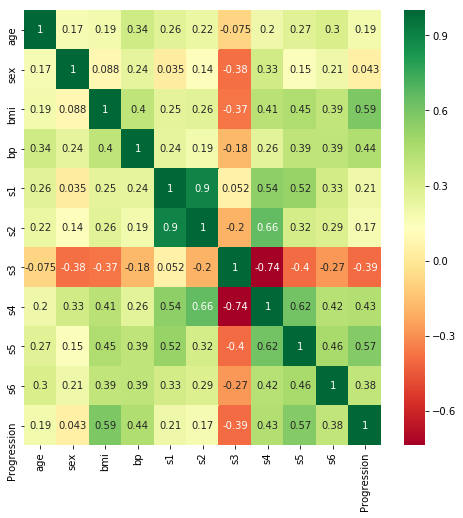

In [42]:
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

In [43]:
#independent variables / explanatory variables
x = db_df.drop(labels='Progression', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = db_df['Progression']

In [44]:
#splitting the dataset into 75%-25% train-test split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=999)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [46]:
#let us import the linear regression from sklearn & create instance of the model.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [47]:
lm.fit(train_x, train_y)

LinearRegression()

In [48]:
predicted_y = lm.predict(test_x)

In [49]:
#let us import metrics from sklearn to evaluate the model. Refer https://scikit-learn.org/stable/modules/model_evaluation.html for more details.
from sklearn import metrics as mt

In [50]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),2))

1) The model explains, 57.57 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 38.08
3) The R-Square score of the model is  0.56


In [52]:
coeff = pd.Series(lm.coef_, index = train_x.columns)
intercept = lm.intercept_
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

age     54.820535
sex   -260.930304
bmi    458.001802
bp     303.502332
s1    -995.584889
s2     698.811401
s3     183.095229
s4     185.698494
s5     838.503887
s6      96.441048
dtype: float64


Intercept:

154.42752615353518




# SECOND solution

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=0)
# There are three steps to model something with sklearn
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)

LinearRegression()

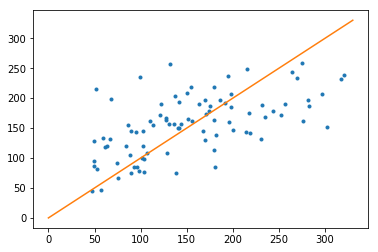

In [25]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()

In [26]:
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)


Coefficient of model : [ -35.55683674 -243.1692265   562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]

Intercept of model 152.5381335195406


In [27]:
predict_train = model.predict(X_train)
print(predict_train)

[145.9502111  100.12253043 123.30242341  77.82273702 148.66482879
 126.20334202 106.99125284 235.36632406 225.1532889  125.66371489
 160.85330302 196.62031065 111.59799753 200.35805671  86.68388263
 214.65329871 110.00773515 221.07104948 262.33945456 114.33579034
 113.94241446 192.97068299 121.27968818 165.52439281  98.99904522
 100.42580061 222.84834626 236.84474659 117.58593296 293.4603429
 115.8768598  126.92810241 113.47418193  70.33918107 246.46568408
 100.68435853 120.95347944 201.96002572 187.212442   194.74243497
 160.04178247 191.20540459 115.86973718 173.32974383 156.2165072
  78.78877216 183.62092475 260.58268965  92.20707581  75.88035461
 109.2063895   99.1614577  253.68789315 166.11177629  97.46831807
 113.67187619 104.49328675  61.5029832  105.87404321 154.14617517
 114.51018234 190.77287958 150.90307633 247.6183396  212.4053856
 290.38216807 102.1451954  100.43028895 156.85279833 149.3443226
 176.48042033 230.63741263 154.34187952 100.2211245  121.21237089
  83.47526258 

In [28]:
# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = model.predict(X_test)
print(predict_test)

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on train dataset :  52.29463904075774
[238.47145247 248.93170646 164.05404165 120.30794355 187.42422054
 259.04865002 113.55556372 188.07597044 149.49663441 236.01099949
 172.24629506 178.88073764 109.15751983  92.13508975 243.33042043
  87.356971   155.72606406  66.99073989 100.42610442 218.09422877
 196.66287912 161.29832968 161.70779605 156.52520454 197.88796516
 167.57984206 120.74478913  84.83879727 192.03728687 160.60687024
 175.17178362  84.22833237 145.7995542  145.97333493 140.96488953
 197.00421108 165.94322494 190.65906468 128.22520508 206.41941223
  84.35851196 164.0256504  144.1056776  184.68355549 177.80238966
  74.32855231 143.3660286  138.67726085 120.81146113 234.34252077
 161.94390244  74.5455476  154.71905074 156.78884927 237.42227096
 174.23053048 190.88212635 118.98373473 132.20418974 168.52674824
 214.74245466 171.42364091 157.37409906 108.86927343 257.06329636
 152.17777143  82.43686464 231.56746032 202.90641336  47.18340199
  78.46954525 129.30170908 104.6

# Third Solution

Let us use another package called Statsmodel & build another model. Statsmodel
package gives a better summary of the model parameters w.r.t Linear Regression

In [53]:
import statsmodels.api as sm
db_df.head(0)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression


In [54]:
lm2 = sm.OLS.from_formula("Progression ~ age+sex+bmi+bp+s1+s2+s3+s4+s5+s6", data=db_df)
# Predictor -> Progression
# Features -> age, sex etc.We are using '+' sign to just indicate all columns to be considered. There is no addition happening.

trained_lm2 = lm2.fit()

In [55]:
predictions = trained_lm2.predict(x)

In [56]:
predictions.head()

0    206.117070
1     68.072348
2    176.884060
3    166.917966
4    128.459842
dtype: float64

In [57]:
summary_model = trained_lm2.summary()
print(summary_model)

                            OLS Regression Results                            
Dep. Variable:            Progression   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.83e-62
Time:                        12:08:54   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.0